In [1]:
import platform
import sys
import importlib
import matplotlib.pyplot as plt

if platform.system() == 'Darwin':
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive/'
    cpuserver_data_FP = '/Users/hyunglokkim/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
sys.path.append(base_FP + '/python_modules')

import HydroAI.Plot as Plot
import HydroAI.Land_Properties as hLP
import HydroAI.Data as Data
import HydroAI.Grid as Grid
importlib.reload(hLP);
importlib.reload(Plot);
importlib.reload(Data);
importlib.reload(Grid);

import warnings
warnings.filterwarnings("ignore")

# 1. MODIS (MCD12C1) LULC map



In [2]:
FP = cpuserver_data_FP + '/LULC/MCD12C1/'
file_list =  Data.get_file_list(FP, 'hdf')
print(file_list)
input_file = file_list[0]

['/data/LULC/MCD12C1/MCD12C1.A2001001.061.2022146170409.hdf', '/data/LULC/MCD12C1/MCD12C1.A2002001.061.2022149015010.hdf', '/data/LULC/MCD12C1/MCD12C1.A2003001.061.2022151221423.hdf', '/data/LULC/MCD12C1/MCD12C1.A2004001.061.2022154032517.hdf', '/data/LULC/MCD12C1/MCD12C1.A2005001.061.2022154061622.hdf', '/data/LULC/MCD12C1/MCD12C1.A2006001.061.2022202141607.hdf', '/data/LULC/MCD12C1/MCD12C1.A2007001.061.2022154134516.hdf', '/data/LULC/MCD12C1/MCD12C1.A2008001.061.2022159101912.hdf', '/data/LULC/MCD12C1/MCD12C1.A2009001.061.2022160072200.hdf', '/data/LULC/MCD12C1/MCD12C1.A2010001.061.2022161022952.hdf', '/data/LULC/MCD12C1/MCD12C1.A2011001.061.2022162024514.hdf', '/data/LULC/MCD12C1/MCD12C1.A2012001.061.2022162172724.hdf', '/data/LULC/MCD12C1/MCD12C1.A2013001.061.2022165063153.hdf', '/data/LULC/MCD12C1/MCD12C1.A2014001.061.2022165213124.hdf', '/data/LULC/MCD12C1/MCD12C1.A2015001.061.2022166123617.hdf', '/data/LULC/MCD12C1/MCD12C1.A2016001.061.2022168010533.hdf', '/data/LULC/MCD12C1/MCD

In [3]:
Data.inspect_hdf4_file(input_file)

Contents of the HDF4 file:
Dataset: Majority_Land_Cover_Type_1
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1')
 - Type: 0
 - Data Type: 21
Dataset: Majority_Land_Cover_Type_1_Assessment
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1')
 - Type: 1
 - Data Type: 21
Dataset: Land_Cover_Type_1_Percent
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1', 'Num_IGBP_Classes:MOD12C1')
 - Type: 2
 - Data Type: 21
Dataset: Majority_Land_Cover_Type_2
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1')
 - Type: 3
 - Data Type: 21
Dataset: Majority_Land_Cover_Type_2_Assessment
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1')
 - Type: 4
 - Data Type: 21
Dataset: Land_Cover_Type_2_Percent
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1', 'Num_UMD_Classes:MOD12C1')
 - Type: 5
 - Data Type: 21
Dataset: Majority_Land_Cover_Type_3
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1')
 - Type: 6
 - Data Type: 21
Dataset: Majority_Land_Cover_Type_3_Assessment
 - Dimensions: ('YDim:MOD12C1', 'XDim:MOD12C1')
 - Type: 7
 - Data 

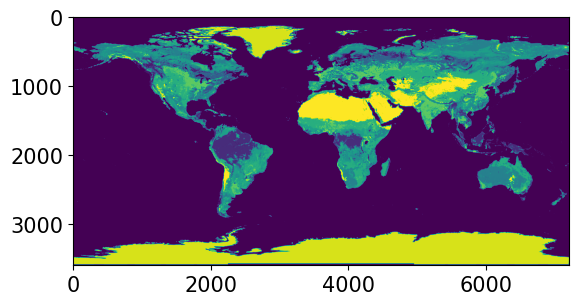

In [4]:
MCD12C1_t1 = Data.read_hdf4_variable(input_file, 'Majority_Land_Cover_Type_1')
MCD12C1_t1
plt.imshow(MCD12C1_t1)

In [5]:
lon_eqd_5km, lat_eqd_5km = Grid.generate_lon_lat_eqdgrid(MCD12C1_t1.shape[0], MCD12C1_t1.shape[1])

In [6]:
MCD12C1_t2 = Data.read_hdf4_variable(input_file, 'Majority_Land_Cover_Type_2')
MCD12C1_t3 = Data.read_hdf4_variable(input_file, 'Majority_Land_Cover_Type_3')

In [10]:
# Example usage
title = "MCD12C1 Land Cover Map"
bounds = [-180, 180, -90, 90]
Plot.plot_LULC_map_MCD12C1(lon_eqd_5km, lat_eqd_5km, MCD12C1_t1 , lulc_type=1, title=title+' (Type 1)', bounds=bounds)
Plot.plot_LULC_map_MCD12C1(lon_eqd_5km, lat_eqd_5km, MCD12C1_t2 , lulc_type=2, title=title+' (Type 2)', bounds=bounds)
Plot.plot_LULC_map_MCD12C1(lon_eqd_5km, lat_eqd_5km, MCD12C1_t3 , lulc_type=3, title=title+' (Type 3)', bounds=bounds)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f17f521ac00> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x7f17e2c91940> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [ ]:
# Resample LULC map
#lon_e2_36km, lat_e2_36km = Grid.generate_lon_lat_e2grid('36km')
#MCD12C1_t1_e2_36km = Data.Resampling(lat_e2_36km, lon_e2_36km, lat_eqd_5km, lon_eqd_5km, MCD12C1_t1, sampling_method='nearest', agg_method='mode', mag_factor=3)

lon_eqd_1, lat_eqd_1 = Grid.generate_lon_lat_eqdgrid(180, 360) #same as below
lon_eqd_1, lat_eqd_1 = Grid.generate_lon_lat_eqdgrid(1) # 1degree = 100km
MCD12C1_t1_eqd_1 = Data.Resampling(lat_eqd_1, lon_eqd_1, lat_eqd_5km, lon_eqd_5km, MCD12C1_t1, sampling_method='nearest', agg_method='mode', mag_factor=3)

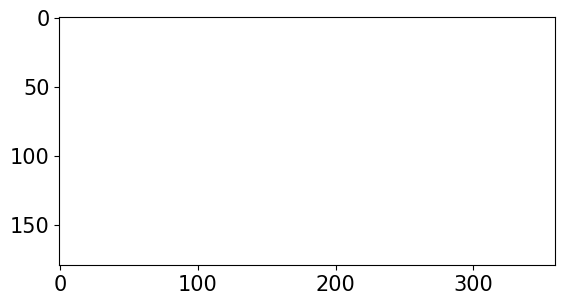

In [21]:
plt.imshow(MCD12C1_t1_eqd_1)

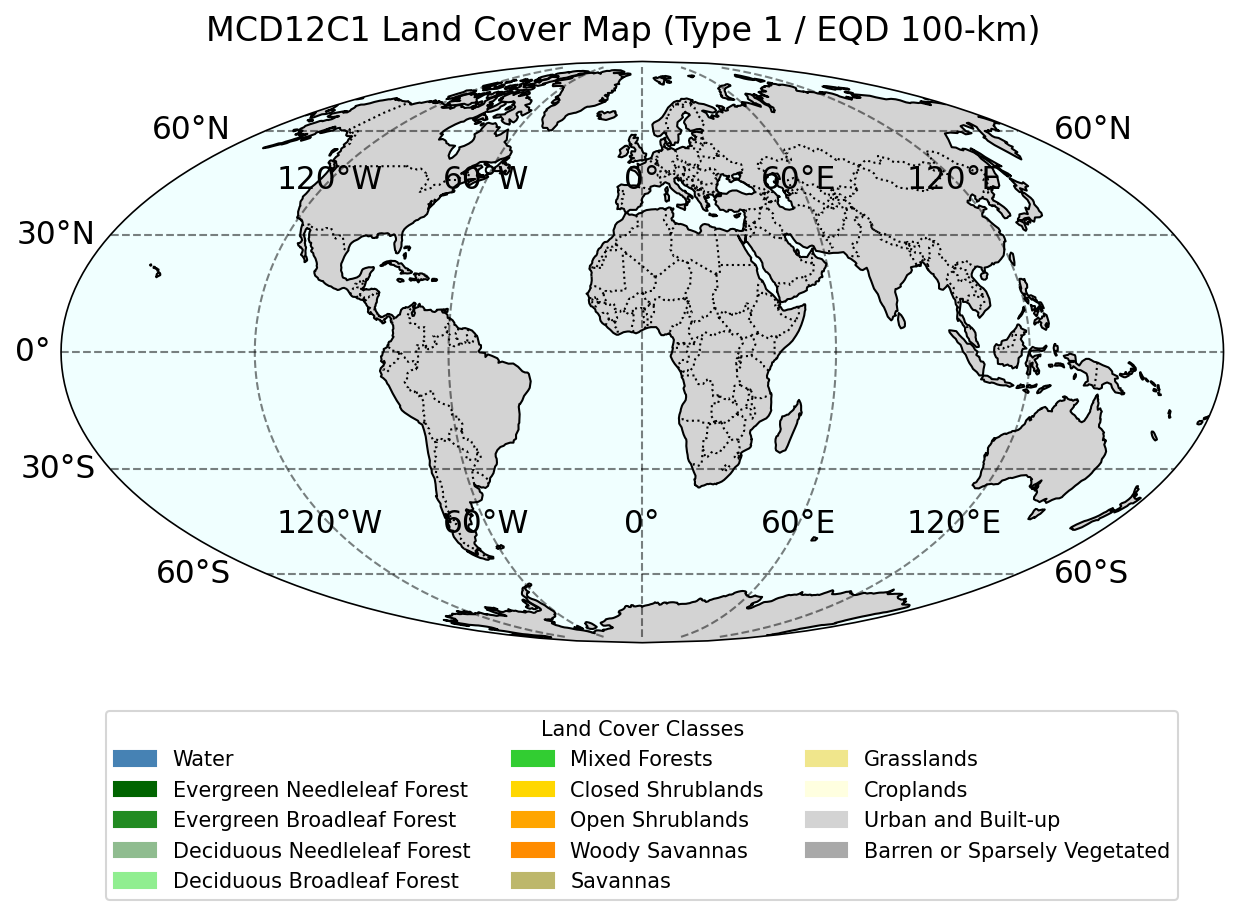

In [17]:
title = "MCD12C1 Land Cover Map"
bounds = [-180, 180, -84, 84]
#Plot.plot_LULC_map_MCD12C1(lon_eqd_5km, lat_eqd_5km, MCD12C1_t1 , lulc_type=1, title=title+' (Type 1)', bounds=bounds)
#Plot.plot_LULC_map_MCD12C1(lon_e2_36km, lat_e2_36km, MCD12C1_t1_e2_36km, lulc_type=1, title=title+' (Type 1 / EASE2 36-km)', bounds=bounds)
Plot.plot_LULC_map_MCD12C1(lon_eqd_1, lat_eqd_1, MCD12C1_t1_eqd_1, lulc_type=2, title=title+' (Type 1 / EQD 100-km)')#, bounds=bounds)

# 2. Copernicus LULC map
## How to Download LULC Data

### 1) Copernicus LULC using Google Earth Engine
Visit [Google Earth Engine Code Editor](https://code.earthengine.google.com) and utilize the following script:

```javascript
// Define the Korean Peninsula's boundary
var koreaBoundary = ee.Geometry.Rectangle([124, 33, 131, 43]);

// Load the dataset and select the 'discrete_classification' band
var dataset = ee.Image('COPERNICUS/Landcover/100m/Proba-V-C3/Global/2019').select('discrete_classification');

// Clip the dataset to the Korean Peninsula
var koreaLandCover = dataset.clip(koreaBoundary);

// Add the clipped image layer to the Map
Map.centerObject(koreaBoundary, 6); // Center the map over the Korean Peninsula
Map.addLayer(koreaLandCover, {}, 'Korea Land Cover');

// Export the image to Google Drive
Export.image.toDrive({
  image: koreaLandCover,
  description: 'KoreaLandCover2019',
  scale: 500,
  region: koreaBoundary,
  fileFormat: 'GeoTIFF'
});


In [17]:
# Example of how to call the function
FP = base_FP + '/GIST/0.Lectures/2024_Spring/EN5423/datasets/week02'
input_file = 'KoreaLandCover2019.tif'
dst_crs = 'EPSG:4326' #https://epsg.io/4326 => lat/lon projection
resolution = 0.01 #for EPSG:4326, 0.03 is around 3-km x 3-km size pixel
rds, lon, lat = LULC.copernicus(FP, input_file, dst_crs, resolution)

CRS of the input file: EPSG:3857


In [18]:
# To print the docstring
print(LULC.copernicus.__doc__)


    Reproject and resample the input raster data, then apply the majority filter to the data.
    Args:
    - FP: File path to the input raster.
    - input_file: Name of the input raster file.
    - dst_crs: The target coordinate reference system.
    - resolution: The target resolution for resampling.
    - output_FP: File path where the output file will be saved. If None, the output file is created temporarily and removed.
    
    Returns:
    - rds: Reprojected and resampled data.
    - lon: Longitude values of pixel centers.
    - lat: Latitude values of pixel centers.
    



    Plot the LULC map from Copernicus data.
    
    Args:
    - longitude: Array of longitude values.
    - latitude: Array of latitude values.
    - rds: Raster dataset containing LULC data.
    - title: Title of the plot.
    - region (optional): If provided, should be a list or tuple in the format [lon_min, lon_max, lat_min, lat_max] 
                         specifying the bounding coordinates for the plot. If not provided, the function will use 
                         the full range of longitude and latitude values from the provided arrays.

    This function plots the land use and land cover (LULC) data, mapping the LULC codes to their respective colors 
    and displaying the result on a map. The map can be focused on a specific region if the 'region' parameter is provided.
    


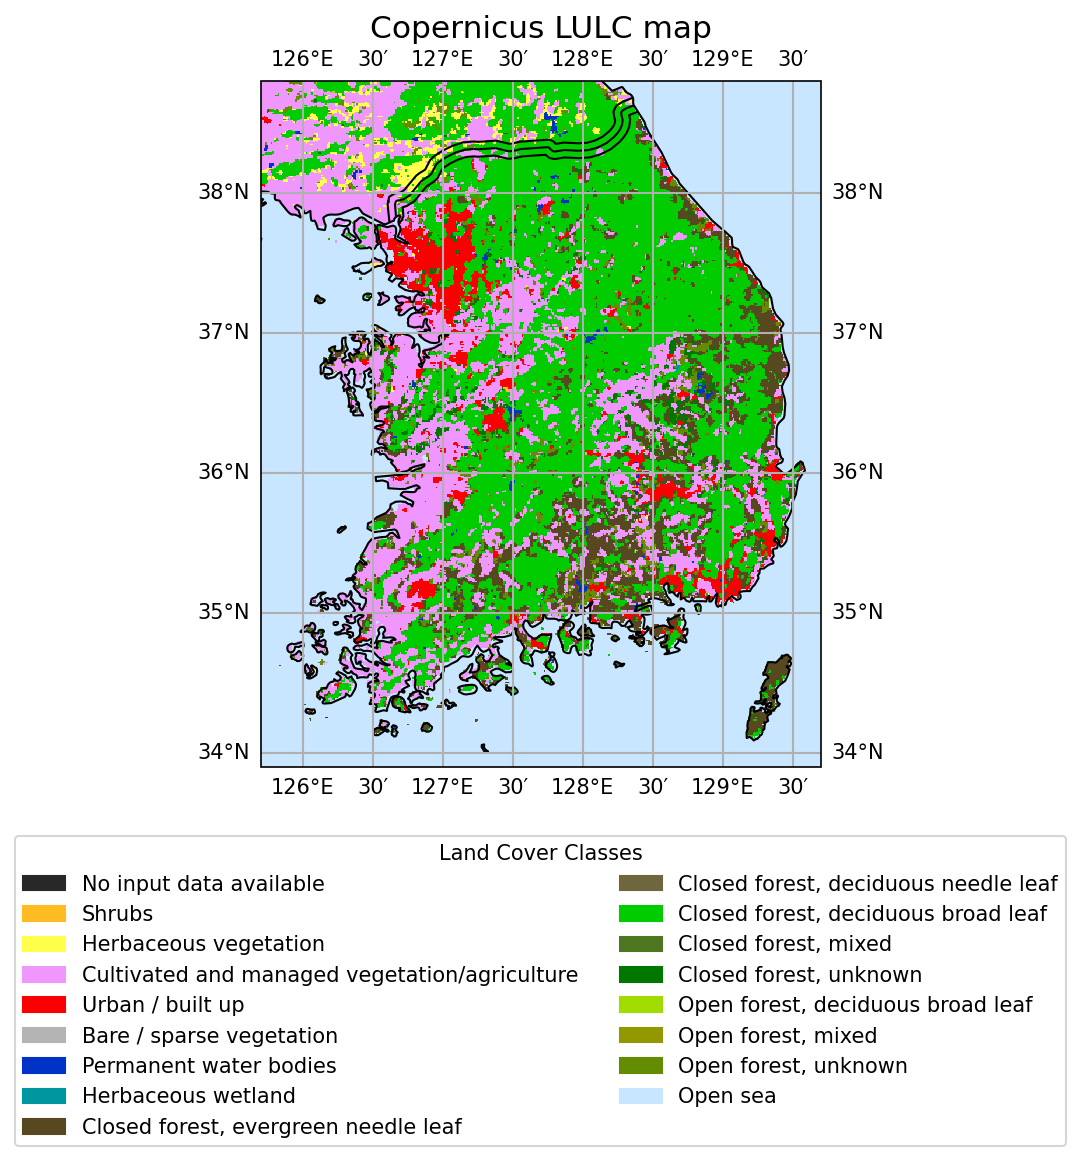

In [19]:
print(Plot.plot_LULC_map_copernicus.__doc__)
# Example of how to make a LULC map
bound = [125.7, 129.7, 33.9, 38.8] # entire Korea
#bound = [126.73, 126.95, 35.17, 35.37] # Gwangju
 
Plot.plot_LULC_map_copernicus(lon, lat, rds, 'Copernicus LULC map', region=bound)